In [16]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import mplhep as hep

In [17]:
hep.style.use(hep.style.CMS)
mpl.rcParams["figure.dpi"] = 60

In [2]:
config_json = {
    "N_Ref": 200000,
    "N_Bkg": 2000,
    "N_Sig": 10,
    "SIG_LOC": 6.4,
    "SIG_STD": 0.16,
    "output_directory": "./output/1D/NRef_200000_NBkg_2000_NSig_10_SigLoc_6.4_SigStd_0.16_Epochs_200000_Patience_5000_WClip_9_Arch_1_4_1/2023_11_15_16_25_33_88388/",
    "input_directory": "./",
    "epochs": 200000,
    "patience": 5000,
    "architecture": [
        1,
        4,
        1
    ],
    "weight_clipping": 9,
    "date": "2023_11_15_16_25_33_88388",
    "pyscript": "toy.py",
    "toys": 50
}

In [3]:
# read debug file debug.h5 in output directory
with h5py.File(config_json["output_directory"] + "debug.h5") as file:
    # keys: 
    # ['backward', 'clip', 'data_gen', 'epoch', 'forward', 'global', 'loss', 'nplm_init', 'push', 'step', 'toy', 'training', 'zero_grad']
    
    global_time    = file["global"][:]
    toy_time       = file["toy"][1:]
    data_gen_time  = file["data_gen"][1:]
    forward_time   = file["forward"][1:]
    backward_time  = file["backward"][1:]
    zero_grad_time = file["zero_grad"][1:]
    push_time      = file["push"][1:]
    clip_time      = file["clip"][1:]
    step_time      = file["step"][1:]
    nplm_init_time = file["nplm_init"][1:]
    training_time  = file["training"][1:]
    loss_time      = file["loss"][1:]
    epoch_time     = file["epoch"][1:]

In [4]:
# reshape times

## global is a scalar
global_time = global_time[0]

# per-toy times
toy_time       = toy_time.reshape(-1, 1)
data_gen_time  = data_gen_time.reshape(-1, 1)
push_time      = push_time.reshape(-1, 1)
nplm_init_time = nplm_init_time.reshape(-1, 1)
training_time  = training_time.reshape(-1, 1)

# per-epoch times
forward_time   = forward_time.reshape(config_json["toys"], config_json["epochs"])
backward_time  = backward_time.reshape(config_json["toys"], config_json["epochs"])
zero_grad_time = zero_grad_time.reshape(config_json["toys"], config_json["epochs"])
clip_time      = clip_time.reshape(config_json["toys"], config_json["epochs"])
step_time      = step_time.reshape(config_json["toys"], config_json["epochs"])
loss_time      = loss_time.reshape(config_json["toys"], config_json["epochs"])
epoch_time     = epoch_time.reshape(config_json["toys"], config_json["epochs"])


In [12]:
# average per-epoch times over all epochs
forward_time_epoch_avg   = np.mean(forward_time,   axis=1).reshape(-1, 1)
backward_time_epoch_avg  = np.mean(backward_time,  axis=1).reshape(-1, 1)
zero_grad_time_epoch_avg = np.mean(zero_grad_time, axis=1).reshape(-1, 1)
clip_time_epoch_avg      = np.mean(clip_time,      axis=1).reshape(-1, 1)
step_time_epoch_avg      = np.mean(step_time,      axis=1).reshape(-1, 1)
loss_time_epoch_avg      = np.mean(loss_time,      axis=1).reshape(-1, 1)
epoch_time_epoch_avg     = np.mean(epoch_time,     axis=1).reshape(-1, 1)

forward_time_epoch_std   = np.std(forward_time,   axis=1).reshape(-1, 1)
backward_time_epoch_std  = np.std(backward_time,  axis=1).reshape(-1, 1)
zero_grad_time_epoch_std = np.std(zero_grad_time, axis=1).reshape(-1, 1)
clip_time_epoch_std      = np.std(clip_time,      axis=1).reshape(-1, 1)
step_time_epoch_std      = np.std(step_time,      axis=1).reshape(-1, 1)
loss_time_epoch_std      = np.std(loss_time,      axis=1).reshape(-1, 1)
epoch_time_epoch_std     = np.std(epoch_time,     axis=1).reshape(-1, 1)

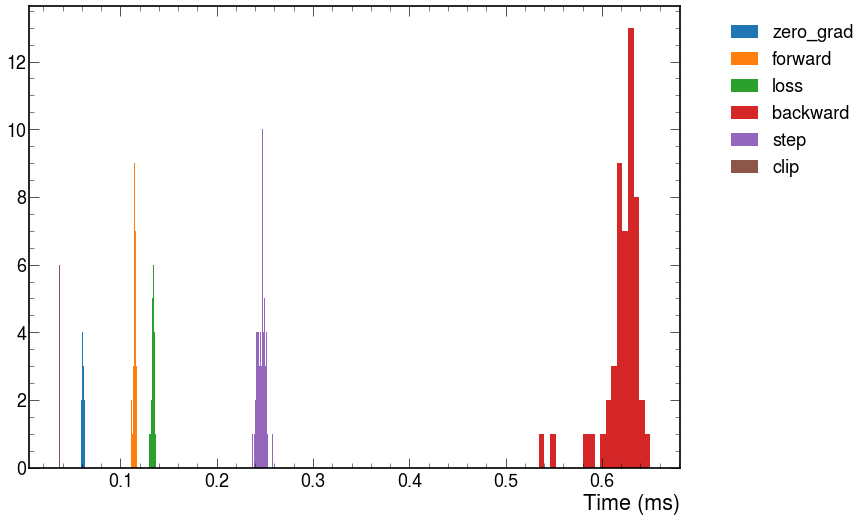

In [77]:
# histogram average per-epoch times and per-toy times

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

ax.hist(zero_grad_time_epoch_avg * 1e3, density=False, bins=20, label="zero_grad")
ax.hist(forward_time_epoch_avg * 1e3,   density=False, bins=20, label="forward")
ax.hist(loss_time_epoch_avg * 1e3,      density=False, bins=20, label="loss")
ax.hist(backward_time_epoch_avg * 1e3,  density=False, bins=20, label="backward")
ax.hist(step_time_epoch_avg * 1e3,      density=False, bins=20, label="step")
ax.hist(clip_time_epoch_avg * 1e3,      density=False, bins=20, label="clip")
# ax.hist(epoch_time_epoch_avg,     density=False, bins=20, label="epoch")

# legend outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel("Time (ms)")

plt.show()

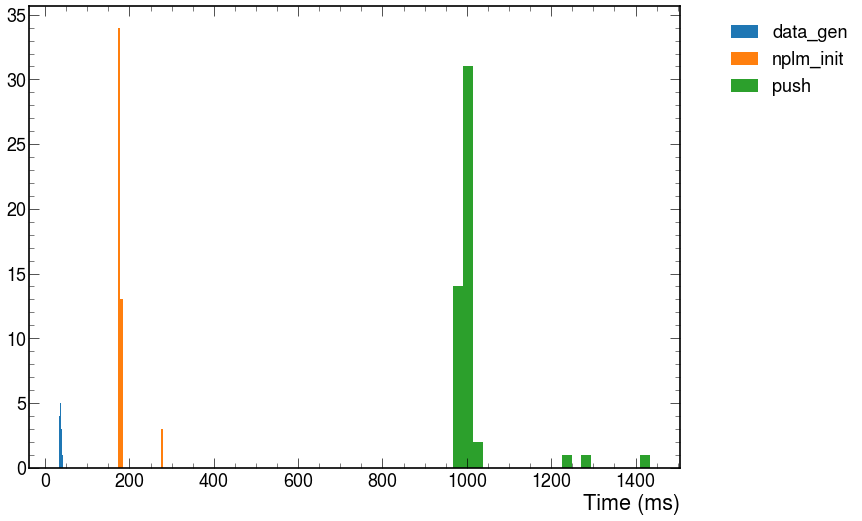

In [91]:
# histogram per-toy times plus average per-epoch times

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

ax.hist(data_gen_time * 1e3, density=False, bins=20, label="data_gen")
ax.hist(nplm_init_time * 1e3, density=False, bins=20, label="nplm_init")
ax.hist(push_time * 1e3,     density=False, bins=20, label="push")


# legend outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel("Time (ms)")

plt.show()